<a href="https://colab.research.google.com/github/Lou1sM/AdvancedML-Project-Dynamic-Coattention-Networks/blob/master/RIMC_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q jmd_imagescraper
!pip install Pillow
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.7 kB/s 
     |████████████████████████████████| 438 kB 67.8 MB/s 
     |████████████████████████████████| 5.8 MB 71.9 MB/s 
     |████████████████████████████████| 1.6 MB 54.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found ex

In [ ]:
google_image_query = 'cute kittens' # replace this with your own query


from pathlib import Path
root = Path().cwd()/"images"
from jmd_imagescraper.core import * 

image_save_dir = google_image_query.replace(' ','_')

_=duckduckgo_search(root, image_save_dir, google_image_query, max_results=1000)
_=duckduckgo_search(root, 'neg_images', 'random images', max_results=1000)

Duckduckgo search: cute kittens


Duckduckgo search: random images


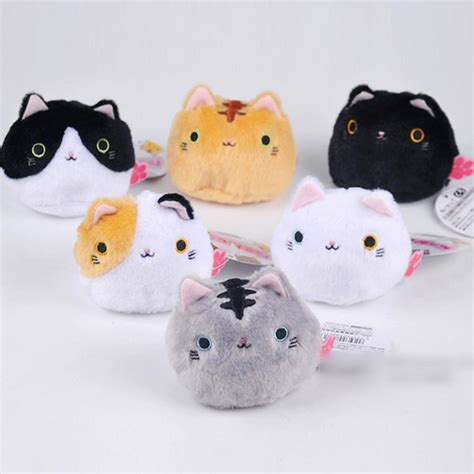

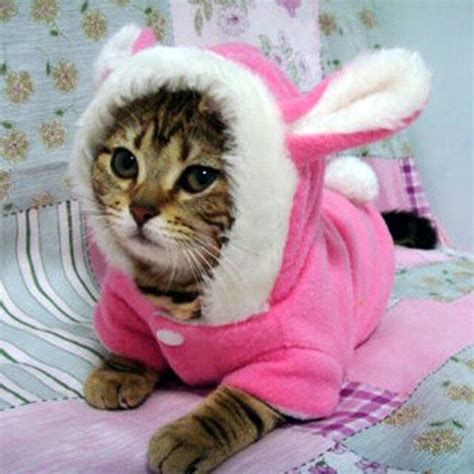

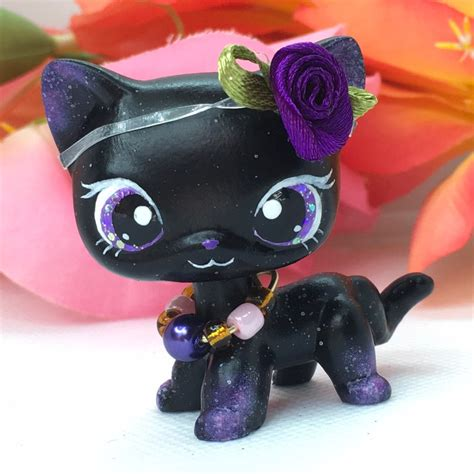

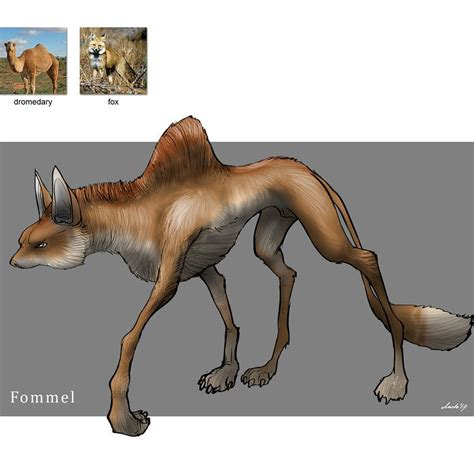

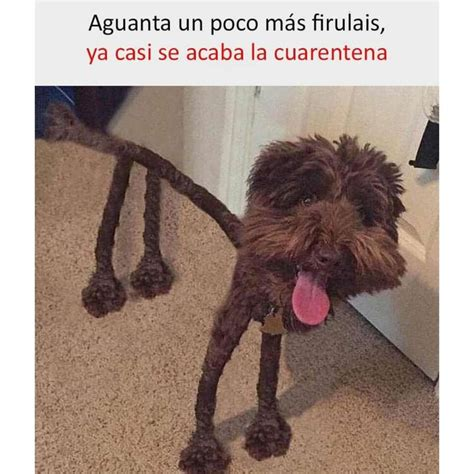

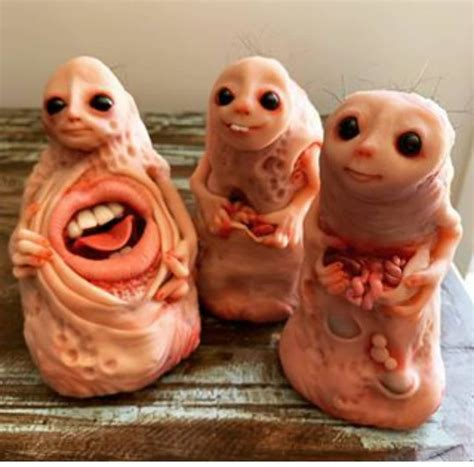

In [ ]:
#View three images that you downloaded, and three random other images


from IPython.display import Image, display
from random import shuffle

all_fns = os.listdir(os.path.join('/content/images/',image_save_dir))
shuffle(all_fns)
for fn in all_fns[:3]:
  fpath = os.path.join('/content/images',image_save_dir,fn)
  display(Image(fpath))

all_neg_fns = os.listdir('/content/images/neg_images')
shuffle(all_neg_fns)
for fn in all_neg_fns[:3]:
  fpath = os.path.join('/content/images/neg_images',fn)
  display(Image(fpath))


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf

batch_size = 64
image_size = 224,224

base_model=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='binary_crossentropy')

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/images/",
    validation_split=0,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

model.fit(augmented_train_ds,epochs=100)

Found 1900 files belonging to 2 classes.
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - 21s 546ms/step - loss: 7.1367
Epoch 2/100
30/30 [==============================] - 16s 492ms/step - loss: 1.8071
Epoch 3/100
30/30 [==============================] - 15s 486ms/step - loss: 1.4675
Epoch 4/100
30/30 [=====

KeyboardInterrupt: ignored

In [ ]:
#import os
#os.path.abspath(os.listdir()[0])
#! rm -rf '/content/images'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1811818038402121653
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10912296946547537768
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]